# DS3000 Day 17

Dec 2/3, 2024

Admin
- Project Deadlines:
  - Mandatory Meeting with TA **by Dec. 5**
  - Project Report and Presentation due **Dec. 9 by 11:59 pm**
  - Statement of Contributions Google Form (submit through Gradescope) due **Dec. 9 by 11:59 pm**
- Please fill out TRACE and, if possible, [this short form](https://forms.gle/EZFgKFQ7GyDTXQQJ9)!
- I'm going ahead and cancelling class on Wednesday.
- Push-Up Time!

Final Push-Up Tally
- Section 03: 9
- Section 05: 10

Content:
- Course Wrap-Up

## Plan for Today

We have several options for today's lesson:

1. Review PCA (Day 16; many of you were somewhere else and this may be quite useful for some of your projects)
2. Bonus Topic(s) (Cosine Similarity? Markov Chains? These are two methods that you should be easily able to understand given the math we've covered in the course)
3. Project Work Day (I'm happy to walk around and answer specific questions about the final stages of your project)
4. AMA (Ask-Me-Anything?)

To give you time to think about it and choose, I will leave the room for 5 minutes, during which time you might also **fill out TRACE**.

### Bonus Topic: Cosine Similarity

Another **unsupervised** machine learning algorithm, the Cosine Similarity algorithm's goal is to:

- Rank observations by how similar they are

It is a very basic algorithm that is often used in simple recommender systems (such as recommending new songs or movies) or in Natural Language Processing (NLP). The algorithm relies upon one key piece of information that we *didn't* cover: another way of calculating the dot product:

$$a^Tb = ||a||\times ||b|| \times \cos(\theta)$$

Where $||a||$ is the length of vector $a$, $||b||$ is the length of vector $b$, and $\theta$ is the **angle between them**. The cosine similarity score of two vectors is simply solved for $\cos(\theta)$:

$$S_C(a, b) = \cos(\theta) = \frac{a^Tb}{||a||\times ||b||}$$

This value is always $-1 \leq S_C \leq 1$, where $-1$ indicates the two vectors are completely opposite of each other, $1$ indicates the two vectors are exactly the same. Thus, for a given vector of data (a single observation), one can ``rank" all other observations from most similar to least similar by the $S_C$ score:

In [1]:
import pandas as pd
# read in the class spotify data from Dr. Gerber's github
url = 'https://raw.githubusercontent.com/eaegerber/data/main/ds3000_spotify_scaled.csv'
df_spot_raw = pd.read_csv(url)
df_spot_raw.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,duration_ms,song_title,artist_name
0,0.671,0.543,7,-5.450,0,0.0357,0.37600,0.000209,0.1100,0.112,124.051,https://api.spotify.com/v1/tracks/2dshtwEGNpyr...,170453,DEEP IN THE WATER,Don Toliver
1,0.508,0.720,11,-5.908,0,0.0628,0.27200,0.000000,0.0563,0.472,79.983,https://api.spotify.com/v1/tracks/4JehYebiI9JE...,261640,Halo,Beyoncé
2,0.765,0.796,9,-3.476,1,0.0356,0.03530,0.000000,0.6980,0.492,107.966,https://api.spotify.com/v1/tracks/42sqQTi2EqDP...,190903,OBVIOUS,Fordo
3,0.338,0.340,9,-12.049,0,0.0339,0.58000,0.003200,0.1160,0.197,82.433,https://api.spotify.com/v1/tracks/5CQ30WqJwcep...,482830,Stairway to Heaven - Remaster,Led Zeppelin
4,0.665,0.655,2,-6.335,1,0.0535,0.00266,0.000000,0.2980,0.626,124.028,https://api.spotify.com/v1/tracks/2GDnUFJ1ZwP3...,128512,ocd,ericdoa


In [2]:
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=(SettingWithCopyWarning))

# get all the numeric features only and standardize them
df_spot = df_spot_raw[["danceability", "energy", "key", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]]
for feat in df_spot.columns:
    df_spot[feat] = (df_spot[feat] - df_spot[feat].mean()) / df_spot[feat].std()

df_spot.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.516614,-0.326724,0.452859,0.669783,-0.504788,0.297830,-0.381541,-0.401177,-1.542448,0.093087,-0.747452
1,-0.575616,0.521290,1.573185,0.527116,-0.070179,-0.049727,-0.382466,-0.802563,-0.019138,-1.408237,0.242350
2,1.146490,0.885408,1.013022,1.284685,-0.506392,-0.840755,-0.382466,3.993886,0.065491,-0.454902,-0.525475
3,-1.714753,-1.299304,1.013022,-1.385809,-0.533655,0.979578,-0.368300,-0.356330,-1.182778,-1.324770,2.643286
4,0.476410,0.209872,-0.947548,0.394105,-0.219325,-0.949835,-0.382466,1.004047,0.632501,0.092304,-1.202706


In [3]:
import numpy as np

# which of the student's songs is most similar to Dr. Gerber's favourite song, Mr. Brightside?
mrb_index = df_spot_raw.index[df_spot_raw['song_title'] == 'Mr. Brightside'].tolist()
print(f'Mr. Brightside is index: {mrb_index}')
mrb_vec = df_spot.iloc[mrb_index].to_numpy()
print("This is the full data point for Mr. Brightside:\n", mrb_vec)

Mr. Brightside is index: [30]
This is the full data point for Mr. Brightside:
 [[-1.62094144  1.4363774  -1.22762962  0.738313    0.12066465 -0.95468035
  -0.38246637 -0.47966048 -1.01775228  0.91011477 -0.17736647]]


In [4]:
# this creates empty lists to fill in with the dot products and cos(theta) of each song relative to Mr. Brightside
mrb_dot_products = []
mrb_cosines = []

# this goes iteratively (loops) through each song in the data set and:
# (a) calculates the dot product between Mr. Brightside and the song
# (b) calculates the cosine(theta) between Mr. Brightside and the song
for song in range(df_spot.shape[0]):

  temp_song_vec = df_spot.iloc[song].to_numpy()

  temp_dot = np.dot(mrb_vec, temp_song_vec)
  temp_cos = temp_dot/(np.linalg.norm(mrb_vec) * np.linalg.norm(temp_song_vec))

  mrb_dot_products.append(temp_dot[0])
  mrb_cosines.append(temp_cos[0])

# this puts the song titles, artists, calculated dot product, and cosine score into a data frame
dict_mrb = {'song_title': df_spot_raw.song_title,
            'artist_name': df_spot_raw.artist_name,
            'mrb_dot_product': mrb_dot_products,
            'mrb_cosine': mrb_cosines}
df_mrb = pd.DataFrame(dict_mrb)

# this sorts the data by the cosine score
sorted_df_mrb = df_mrb.sort_values(by='mrb_cosine', ascending=False)

# this prints the top six songs
sorted_df_mrb.head(6)

,song_title,artist_name,mrb_dot_product,mrb_cosine
30,Mr. Brightside,The Killers,9.940728,1.000000
6,Godlight,Noah Kahan,6.710453,0.832099
33,Plastic Promises,Set It Off,11.967670,0.759871
12,jeans,2hollis,6.550114,0.755340
14,Famous,Kanye West,6.107416,0.700019
36,Legends Never Die,League of Legends,5.211345,0.697941


In [5]:
# this prints the bottom five songs
sorted_df_mrb.tail()

,song_title,artist_name,mrb_dot_product,mrb_cosine
107,At Your Best (You Are Love),Aaliyah,-6.393743,-0.686950
106,Little by Little,The Marías,-7.177716,-0.699085
102,Tell Me Why,Gotts Street Park,-7.089317,-0.729751
146,Blue Bayou,Linda Ronstadt,-9.797209,-0.819161
142,My Favorite Part,Mac Miller,-7.647689,-0.832008


### Cosine Similarity Notes

- In this simplest case, we note that each of the features is weighted equally; two songs being the same length is just as impactful as two songs having the same danceability (or tempo); to get more accurate results, we may want to focus on only those characteristics we think are meaningful (or that the user potentially cares most about)
- This works well if we do not care about magnitude of the vectors (notice that the cosine only considers the angle between them); more complex models are usually necessary to understand more complex relationships

In [6]:
# what if I reduce it to the features I care most about?
df_spot = df_spot_raw[["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "tempo"]]
for feat in df_spot.columns:
    df_spot[feat] = (df_spot[feat] - df_spot[feat].mean()) / df_spot[feat].std()

df_spot.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,tempo
0,0.516614,-0.326724,0.669783,-0.504788,0.297830,-0.381541,0.093087
1,-0.575616,0.521290,0.527116,-0.070179,-0.049727,-0.382466,-1.408237
2,1.146490,0.885408,1.284685,-0.506392,-0.840755,-0.382466,-0.454902
3,-1.714753,-1.299304,-1.385809,-0.533655,0.979578,-0.368300,-1.324770
4,0.476410,0.209872,0.394105,-0.219325,-0.949835,-0.382466,0.092304


In [7]:
mrb_index = df_spot_raw.index[df_spot_raw['song_title'] == 'Mr. Brightside'].tolist()
print(f'Mr. Brightside is index: {mrb_index}')
mrb_vec = df_spot.iloc[mrb_index].to_numpy()
print("This is the full data point for Mr. Brightside:\n", mrb_vec)

Mr. Brightside is index: [30]
This is the full data point for Mr. Brightside:
 [[-1.62094144  1.4363774   0.738313    0.12066465 -0.95468035 -0.38246637
   0.91011477]]


In [8]:
# this creates empty lists to fill in with the dot products and cos(theta) of each song relative to Mr. Brightside
mrb_dot_products = []
mrb_cosines = []

# this goes iteratively (loops) through each song in the data set and:
# (a) calculates the dot product between Mr. Brightside and the song
# (b) calculates the cosine(theta) between Mr. Brightside and the song
for song in range(df_spot.shape[0]):

  temp_song_vec = df_spot.iloc[song].to_numpy()

  temp_dot = np.dot(mrb_vec, temp_song_vec)
  temp_cos = temp_dot/(np.linalg.norm(mrb_vec) * np.linalg.norm(temp_song_vec))

  mrb_dot_products.append(temp_dot[0])
  mrb_cosines.append(temp_cos[0])

# this puts the song titles, artists, calculated dot product, and cosine score into a data frame
dict_mrb = {'song_title': df_spot_raw.song_title,
            'artist_name': df_spot_raw.artist_name,
            'mrb_dot_product': mrb_dot_products,
            'mrb_cosine': mrb_cosines}
df_mrb = pd.DataFrame(dict_mrb)

# this sorts the data by the cosine score
sorted_df_mrb = df_mrb.sort_values(by='mrb_cosine', ascending=False)

# this prints the top six songs
sorted_df_mrb.head(6)

,song_title,artist_name,mrb_dot_product,mrb_cosine
30,Mr. Brightside,The Killers,7.136301,1.000000
78,BABY I'M BACK,The Kid LAROI,5.637945,0.909424
6,Godlight,Noah Kahan,5.848922,0.877055
33,Plastic Promises,Set It Off,10.973229,0.858383
81,The Nights,Avicii,3.903320,0.843742
89,King For A Day,Pierce The Veil,6.581363,0.836378


### Bonus Topic: Markov Chains

Markov chains are, by themselves **unsupervised**, but are most often used in conjunction with supervised learning algorithms. However, for a basic introduction, we will focus only on using Markov chains in the situation where:

- there is a set of states representing possibly values of a system
- observations in the system might be in any of the states at a discrete time point $t$, and move to another state (or stay in the current state) at time point $t+1$
- we define a set of **transition probablities** as a matrix where
  - each probability represents the likelihood of moving from one state to another, or remaining in the current state, when going from time point $t$ to time point $t+1$
 
#### Example

Imagine the system consists of two states: someone who has COVID (C) or does not have COVID (N). Imagine we also know that on any given day ($t$):

- 2\% of the people who don't have COVID will catch COVID
- 14\% of the people who have COVID will recover from COVID

Visualize it with a **directed graph**:

<a href="https://ibb.co/jb5vz2f"><img src="https://i.ibb.co/BcPVGx3/markov2.png" alt="markov2" border="0"></a><br />

The Markov chain can be represented as a matrix:

$$\begin{bmatrix} 0.86 & 0.02 \\ 0.14 & 0.98 \end{bmatrix}$$

Note:

- The first row represents how the state C changes from $t$ to $t+1$
  - 86\% of C members remain in C, while 2\% of N move to C
- The second row represents how the state N changes from $t$ to $t+1$
  - 14\% of C members move to N, while 98\% of N stay in N

Assume at time $t=0$ you have 50 people with COVID (state C) and 50 without COVID (state N). Call this vector:

$$x_t = x_0 = \begin{bmatrix} c_0 \\ n_0 \end{bmatrix} = \begin{bmatrix} 50 \\ 50 \end{bmatrix}$$

We can find the number in each state at time $t=1$ by simply multiplying:

$$x_1 = \begin{bmatrix} 0.86 & 0.02 \\ 0.14 & 0.98 \end{bmatrix}x_0 = \begin{bmatrix} 0.86 & 0.02 \\ 0.14 & 0.98 \end{bmatrix}\begin{bmatrix} 50 \\ 50 \end{bmatrix} = \begin{bmatrix} .86(50) + .02(50) \\ .14(50) + .98(50) \end{bmatrix} = \begin{bmatrix} 44 \\ 56 \end{bmatrix}$$

We iterate to find the system's status at time $t=2$ (if we call the Markov matrix $A$):

$$x_2 = Ax_1 = \begin{bmatrix} .86(44) + .02(56) \\ .14(44) + .98(56) \end{bmatrix} = \begin{bmatrix} 38.96 \\ 61.04 \end{bmatrix}$$

And, we could extend this to find the distribution at any state, since above $x_2 = Ax_1 = A(Ax_0) = AAx_0 = A^2x_0$:

$$x_t = A^tx_0$$

In [9]:
A = np.array([[.86, .02],
              [.14, .98]])
# say we start with a fully healthy population
x0 = np.array([[0],
               [100]])

# how many people have covid after 50 days?
# can use np.linalg.matrix_power()
x2 = np.linalg.matrix_power(A, 2).dot(np.array([[50], [50]])) # to verify it works like we did by hand
x50 = np.linalg.matrix_power(A, 50).dot(x0)
x2 # this uses the original 50/50 split at t=0

array([[38.96],
       [61.04]])

In [10]:
x50

array([[12.49795415],
       [87.50204585]])

#### Markov Chain Steady State

Notice that when we started with $x_0 = \begin{bmatrix} 50 \\ 50 \end{bmatrix}$, the number of COVID cases immediately went down, but when we started with $x_0 = \begin{bmatrix} 0 \\ 100 \end{bmatrix}$, they eventually went up.

This implies that for this Markov chain there exists a **steady state** solution; a distribution of the states that the system will eventually converge to (at which point, every day the numbers of people with/without COVID will not change).

To find the steady state distribution, we only need to find **the eigenvector of $A$ associated with the eigenvalue of $1$ (normalized to 1)**.

- Note: if a Markov chain matrix does not *have* an eigenvalue of $1$, then that Markov chain does not have a steady state.

In [11]:
# verify that the Markov chain has a steady state
evals, evecs = np.linalg.eig(A)
evals

array([0.84, 1.  ])

In [12]:
# the normalized eigenvector for the eigenvalue 1:
steady_state = evecs[:,1]/sum(evecs[:,1])
steady_state

array([0.125, 0.875])

In [13]:
# multiply it by the population to find the final system's steady state
100*steady_state

array([12.5, 87.5])

In [14]:
# note that if we plug in a really big value of t, we should get close to this:
A = np.array([[.86, .02],
              [.14, .98]])
# say we start with a fully healthy population
x0 = np.array([[0],
               [100]])

# how many people have covid after 100 days?
# can use np.linalg.matrix_power()
x100 = np.linalg.matrix_power(A, 100).dot(x0)
x100

array([[12.49999967],
       [87.50000033]])

### Markov Chains Notes

- These are the *most basic* version of Markov chains:
  - Discrete state space (observations may only be in one state at a time)
  - Discrete time (we only measure the system at discrete time points)
  - Static probabilities (as opposed to Dynamic: the probabilities remain the same at each time point)
- This does limit the utility of this version, but hopefully you can see some of the extensions
- Markov chains are used in many applications but mainly:
  - Data simulation
  - Parameter estimation (for complex models)
 
How might you use real data to estimate a Markov chain?

In [20]:
# imagine you have 100 days of stock values, and whether or not the stock increased or decreased from the day before
stock_vals = [400]
stock_chng = ['I'] # assume day 0 was an increase from the previous day
for i in range(99):
    inc = np.random.uniform(-2, 3)
    stock_vals.append(stock_vals[i] + inc)
    if inc > 0:
        stock_chng.append('I')
    else:
        stock_chng.append('D')

stock_df = pd.DataFrame({'Values': stock_vals,
                         'Change': stock_chng})
stock_df.tail()

,Values,Change
95,427.277555,I
96,427.264812,D
97,426.310416,D
98,428.634759,I
99,427.946656,D


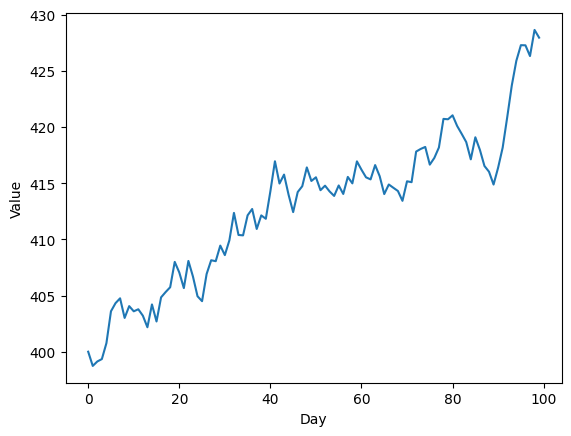

In [22]:
import matplotlib.pyplot as plt
plt.plot(list(range(100)), stock_df.Values)
plt.xlabel('Day')
plt.ylabel('Value');

In [25]:
# To estimate the transition probability matrix for the stock
# loop through and record how many days were I->I, D->I, I->D, D->D
Tmat = np.zeros((2, 2))
for i in range(len(stock_chng)-1):
    if stock_chng[i+1] == 'I' and stock_chng[i] == 'I':
        Tmat[0,0] += 1
    if stock_chng[i+1] == 'I' and stock_chng[i] == 'D':
        Tmat[1,0] += 1
    if stock_chng[i+1] == 'D' and stock_chng[i] == 'I':
        Tmat[0,1] += 1
    if stock_chng[i+1] == 'D' and stock_chng[i] == 'D':
        Tmat[1,1] += 1

Tmat

array([[23., 29.],
       [28., 19.]])

In [30]:
# divide by the column totals to get the matrix (COLUMNS should add to 1)
# if you had a portfolio of stocks, you would take the weighted average of all their transition matrices
# weighted by the proportion of stocks owned (but also note that this is an incredible oversimplification of a complex problem)
Pmat = Tmat/sum(Tmat)
Pmat

array([[0.45098039, 0.60416667],
       [0.54901961, 0.39583333]])

In [31]:
# and the steady state, if it exists, tells you in the long run what happens with the stock
evals, evecs = np.linalg.eig(Pmat)
evals

array([ 1.        , -0.15318627])

In [32]:
# the normalized eigenvector for the eigenvalue 1:
steady_state = evecs[:,0]/sum(evecs[:,0])
steady_state
# implies that in the long run (assuming this Markov chain fits the data), the stock will give a 2.39% return (based on the random data I simulated)

array([0.52391073, 0.47608927])